In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import dataset 
df=pd.read_csv('D:\\ExcelR\\simple linear4\\Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#no null values 

<AxesSubplot:>

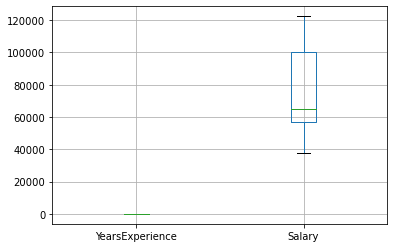

In [6]:
df.boxplot()

In [7]:
# There is no outliers in our dataset

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


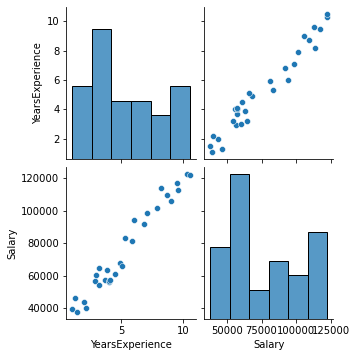

In [9]:
import seaborn as sns
sns.pairplot(data=df)

In [10]:
#there is positive assosiation between yearsExpe and Salary

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
import numpy as np
import statsmodels.formula.api as smf 

# Model 1 simple linear regression

In [13]:
# Bulding model by ols method for prediction of salary by years of experience.
model=smf.ols('Salary~YearsExperience',data=df).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        12:43:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
pred=model.predict(df.iloc[:,0]) #model.predict(df['YearsExperience'])
pred
model.resid
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [16]:
rmse_lin=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred))**2))
rmse_lin

5592.043608760662

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

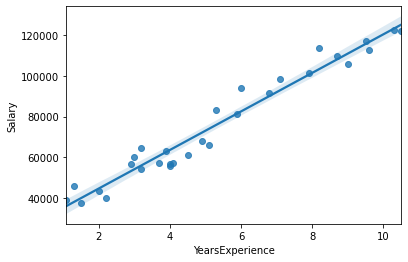

In [17]:
 sns.regplot(x='YearsExperience',y='Salary',data=df)

#  Prediction for 10.5 YearsExperience

In [18]:
newdata=pd.Series([10.5])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
model.predict(data_pred)

0    125016.804574
dtype: float64

#  LOG TRASFORMATION MODEL 2

In [19]:
model2=smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
model2.params
model2.resid
model2.resid_pearson

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.25e-13
Time:                        12:43:59   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred1=model2.predict(df.iloc[:,0])

In [22]:
rmse_log=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred1))**2))
rmse_log

10302.893706228308

In [23]:
# prediction of salary using yearsexperience

In [36]:
newdata=pd.Series([10.5,11,12])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
model2.predict(data_pred)

0    110351.454145
1    112239.328860
2    115770.423513
dtype: float64

# EXPONENTIAL TRASFORMATION MODEL 3

In [25]:
#second exponential TRASFORMATION
model3=smf.ols('np.log(Salary)~YearsExperience',data=df).fit()
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           7.03e-18
Time:                        12:44:01   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred2=model3.predict(df.iloc[:,0])

In [28]:
rmse_exp=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2))
rmse_exp

80630.25750602805

# model 1 is better than other models in this data set 